In [1]:
# Dependencies and Setup
#DP
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

from scipy.stats import linregress



#Get 2019 Data
CapitalBike201901 = "../UnzipRawFiles/2019/201901-capitalbikeshare-tripdata.csv"
CapitalBike201902 = "../UnzipRawFiles/2019/201902-capitalbikeshare-tripdata.csv"
CapitalBike201903 = "../UnzipRawFiles/2019/201903-capitalbikeshare-tripdata.csv"
CapitalBike201904 = "../UnzipRawFiles/2019/201904-capitalbikeshare-tripdata.csv"
CapitalBike201905 = "../UnzipRawFiles/2019/201905-capitalbikeshare-tripdata.csv"
CapitalBike201906 = "../UnzipRawFiles/2019/201906-capitalbikeshare-tripdata.csv"
CapitalBike201907 = "../UnzipRawFiles/2019/201907-capitalbikeshare-tripdata.csv"
CapitalBike201908 = "../UnzipRawFiles/2019/201908-capitalbikeshare-tripdata.csv"
CapitalBike201909 = "../UnzipRawFiles/2019/201909-capitalbikeshare-tripdata.csv"
CapitalBike201910 = "../UnzipRawFiles/2019/201910-capitalbikeshare-tripdata.csv"
CapitalBike201911 = "../UnzipRawFiles/2019/201911-capitalbikeshare-tripdata.csv"
CapitalBike201912 = "../UnzipRawFiles/2019/201912-capitalbikeshare-tripdata.csv"



CapitalBike201901_df = pd.read_csv(CapitalBike201901)
CapitalBike201902_df = pd.read_csv(CapitalBike201902)
CapitalBike201903_df = pd.read_csv(CapitalBike201903)
CapitalBike201904_df = pd.read_csv(CapitalBike201904)
CapitalBike201905_df = pd.read_csv(CapitalBike201905)
CapitalBike201906_df = pd.read_csv(CapitalBike201906)
CapitalBike201907_df = pd.read_csv(CapitalBike201907)
CapitalBike201908_df = pd.read_csv(CapitalBike201908)
CapitalBike201909_df = pd.read_csv(CapitalBike201909)
CapitalBike201910_df = pd.read_csv(CapitalBike201910)
CapitalBike201911_df = pd.read_csv(CapitalBike201911)
CapitalBike201912_df = pd.read_csv(CapitalBike201912)

In [2]:
#DP
CapitalBike201906_df.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
350139,733,2019-06-30 23:57:17,2019-07-01 00:09:30,31609,Maine Ave & 7th St SW,31610,Eastern Market / 7th & North Carolina Ave SE,W22399,Casual
350140,5127,2019-06-30 23:58:11,2019-07-01 01:23:39,31292,22nd St & Constitution Ave NW,31261,21st St & Constitution Ave NW,W20536,Casual
350141,5145,2019-06-30 23:58:24,2019-07-01 01:24:10,31292,22nd St & Constitution Ave NW,31261,21st St & Constitution Ave NW,W20531,Casual
350142,331,2019-06-30 23:59:08,2019-07-01 00:04:39,31610,Eastern Market / 7th & North Carolina Ave SE,31612,D St & Maryland Ave NE,W00795,Member
350143,467,2019-06-30 23:59:17,2019-07-01 00:07:05,31319,Wisconsin Ave & Brandywine St NW,32014,Friendship Hts Metro / Wisconsin Ave & Wiscons...,W23253,Casual


In [3]:
#DP
combined_2019_df = pd.concat([CapitalBike201901_df, CapitalBike201902_df,CapitalBike201903_df,CapitalBike201904_df, CapitalBike201905_df, CapitalBike201906_df,CapitalBike201907_df,CapitalBike201908_df,CapitalBike201909_df,CapitalBike201910_df,CapitalBike201911_df,CapitalBike201912_df], ignore_index=True)


In [4]:
#DP
combined_2019_df.count()

Duration                3398417
Start date              3398417
End date                3398417
Start station number    3398417
Start station           3398417
End station number      3398417
End station             3398417
Bike number             3398403
Member type             3398417
dtype: int64

In [5]:
#DP
#cleanup
combined_2019_df.dropna(inplace = True)

In [6]:
#DP
combined_2019_df.count()

Duration                3398403
Start date              3398403
End date                3398403
Start station number    3398403
Start station           3398403
End station number      3398403
End station             3398403
Bike number             3398403
Member type             3398403
dtype: int64

In [7]:
#DP
combined_2019_df['DateTime'] =  pd.to_datetime(combined_2019_df['Start date'], format='%Y-%m-%d %H:%M:%S')
# extracting time from timestamp
combined_2019_df['Time'] = combined_2019_df['DateTime'].dt.strftime('%H:%M')
combined_2019_df['Month'] = combined_2019_df['DateTime'].dt.strftime('%b')
combined_2019_df['Date'] = combined_2019_df['DateTime'].dt.strftime('%x')
#combined_2019_df.tail()

In [8]:
#DP
combined_2019_df = combined_2019_df.drop(['Start station number','Start station','End station number','End station'], axis = 1)

combined_2019_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date
0,230,2019-01-01 00:04:48,2019-01-01 00:08:39,E00141,Member,2019-01-01 00:04:48,00:04,Jan,01/01/19
1,1549,2019-01-01 00:06:37,2019-01-01 00:32:27,W24067,Casual,2019-01-01 00:06:37,00:06,Jan,01/01/19
2,177,2019-01-01 00:08:46,2019-01-01 00:11:44,W22654,Casual,2019-01-01 00:08:46,00:08,Jan,01/01/19
3,228,2019-01-01 00:08:47,2019-01-01 00:12:35,W22336,Member,2019-01-01 00:08:47,00:08,Jan,01/01/19
4,1300,2019-01-01 00:12:29,2019-01-01 00:34:10,70004,Member,2019-01-01 00:12:29,00:12,Jan,01/01/19


In [9]:

#combined_2019_df.to_csv('2019Data.csv', index = False)


In [10]:
#DP
#get 2020 data
CapitalBike202001 = "../UnzipRawFiles/2020/202001-capitalbikeshare-tripdata.csv"
CapitalBike202002 = "../UnzipRawFiles/2020/202002-capitalbikeshare-tripdata.csv"
CapitalBike202003 = "../UnzipRawFiles/2020/202003-capitalbikeshare-tripdata.csv"
CapitalBike202005 = "../UnzipRawFiles/2020/202005-capitalbikeshare-tripdata.csv"
CapitalBike202006 = "../UnzipRawFiles/2020/202006-capitalbikeshare-tripdata.csv"
CapitalBike202007 = "../UnzipRawFiles/2020/202007-capitalbikeshare-tripdata.csv"
CapitalBike202008 = "../UnzipRawFiles/2020/202008-capitalbikeshare-tripdata.csv"
CapitalBike202009 = "../UnzipRawFiles/2020/202009-capitalbikeshare-tripdata.csv"
CapitalBike202010 = "../UnzipRawFiles/2020/202010-capitalbikeshare-tripdata.csv"
CapitalBike202011 = "../UnzipRawFiles/2020/202011-capitalbikeshare-tripdata.csv"
CapitalBike202012 = "../UnzipRawFiles/2020/202012-capitalbikeshare-tripdata.csv"


CapitalBike202001_df = pd.read_csv(CapitalBike202001)
CapitalBike202002_df = pd.read_csv(CapitalBike202002)
CapitalBike202003_df = pd.read_csv(CapitalBike202003)
CapitalBike202005_df = pd.read_csv(CapitalBike202005)
CapitalBike202006_df = pd.read_csv(CapitalBike202006)
CapitalBike202007_df = pd.read_csv(CapitalBike202007)
CapitalBike202008_df = pd.read_csv(CapitalBike202008)
CapitalBike202009_df = pd.read_csv(CapitalBike202009)
CapitalBike202010_df = pd.read_csv(CapitalBike202010)
CapitalBike202011_df = pd.read_csv(CapitalBike202011)
CapitalBike202012_df = pd.read_csv(CapitalBike202012)

In [11]:
#MB
CapitalBike202007_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,453843A617C5BA52,docked_bike,2020-07-22 05:37:39,2020-07-22 05:41:01,11th & M St NW,31266.0,14th & L St NW,31283.0,38.905579,-77.027313,38.903658,-77.031737,member
1,FFCF14024AC20363,docked_bike,2020-07-05 15:59:09,2020-07-05 16:15:12,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd & N Illinois St,31902.0,38.879476,-77.114563,38.876528,-77.127120,member
2,B2F1307EF206C973,docked_bike,2020-07-11 09:11:30,2020-07-11 09:25:54,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd & N Illinois St,31902.0,38.879476,-77.114563,38.876528,-77.127120,member
3,6694BCE0612D1823,electric_bike,2020-07-16 08:44:44,2020-07-16 09:08:49,Philadelphia & Maple Ave,32010.0,East West Hwy & Blair Mill Rd,32019.0,38.981202,-77.011275,38.990422,-77.029423,member
4,251D19F64439E1F4,docked_bike,2020-07-27 12:09:55,2020-07-27 13:58:37,Wilson Blvd. & N. Vermont St.,31926.0,Utah St & 11th St N,31049.0,38.879476,-77.114563,38.883669,-77.113905,casual


In [12]:

#MB
#combine data
#combined_2020_df = pd.concat([CapitalBike202001_df, CapitalBike202002_df,CapitalBike202003_df, CapitalBike202005_df, CapitalBike202006_df, CapitalBike202007_df, CapitalBike202008_df, CapitalBike202009_df, CapitalBike202010_df, CapitalBike202011_df, CapitalBike202012_df], ignore_index=True)
# #get columns that are needed
#combined_2020_df = combined_2020_df[["Duration", "Start date","End date","Start station number","Start station","End station number","End station","Bike number","Member type"]]

#====Data format changed between March 2020 and May 2020....converted May-Dec dataset to align with Jan2019 - Mar2020 datasets.
combined_2020_1st_df = pd.concat([CapitalBike202001_df, CapitalBike202002_df,CapitalBike202003_df], ignore_index=True)
combined_2020_2nd_df = pd.concat([CapitalBike202005_df, CapitalBike202006_df, CapitalBike202007_df, CapitalBike202008_df, CapitalBike202009_df, CapitalBike202010_df, CapitalBike202011_df, CapitalBike202012_df], ignore_index=True)
#====Had to create a duration column in seconds from starting and ending times to alighn with 2019 data.
combined_2020_2nd_df['Duration'] = pd.to_timedelta(pd.to_datetime(combined_2020_2nd_df['ended_at'], format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(combined_2020_2nd_df['started_at'], format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()
combined_2020_2ndcol_df = combined_2020_2nd_df[['Duration','started_at','ended_at','start_station_id','start_station_name','end_station_id','end_station_name','ride_id','member_casual']]
combined_2020_2ndcol_df = combined_2020_2ndcol_df.rename(columns={'started_at':'Start date','ended_at':'End date','start_station_id':'Start station number','start_station_name':'Start station','end_station_id':'End station number','end_station_name':'End station','ride_id':'Bike number','member_casual':'Member type'})

In [13]:
#MB
combined_2020_2ndcol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604043 entries, 0 to 1604042
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Duration              1604043 non-null  float64
 1   Start date            1604043 non-null  object 
 2   End date              1604043 non-null  object 
 3   Start station number  1519404 non-null  float64
 4   Start station         1519404 non-null  object 
 5   End station number    1506999 non-null  float64
 6   End station           1506999 non-null  object 
 7   Bike number           1604043 non-null  object 
 8   Member type           1604043 non-null  object 
dtypes: float64(3), object(6)
memory usage: 110.1+ MB


In [14]:
#MB
combined_2020_1st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537400 entries, 0 to 537399
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Duration              537400 non-null  int64 
 1   Start date            537400 non-null  object
 2   End date              537400 non-null  object
 3   Start station number  537400 non-null  int64 
 4   Start station         537400 non-null  object
 5   End station number    537400 non-null  int64 
 6   End station           537400 non-null  object
 7   Bike number           537400 non-null  object
 8   Member type           537400 non-null  object
dtypes: int64(3), object(6)
memory usage: 36.9+ MB


In [15]:
#MB
#---NEW consolidated 2020 dataset
combined_2020_df = pd.concat([combined_2020_1st_df, combined_2020_2ndcol_df], ignore_index=True)
combined_2020_df = combined_2020_df.drop(['Start station number','Start station','End station number','End station'], axis = 1)
combined_2020_df.tail()

,Duration,Start date,End date,Bike number,Member type
2141438,1627.0,2020-12-12 13:49:55,2020-12-12 14:17:02,A10ED3D50E5AB612,casual
2141439,1365.0,2020-12-03 13:43:26,2020-12-03 14:06:11,F146CC9669ABF5EC,casual
2141440,2159.0,2020-12-06 07:27:47,2020-12-06 08:03:46,614005BC98FE93F7,casual
2141441,2458.0,2020-12-21 13:46:01,2020-12-21 14:26:59,86783BF38F4567FA,casual
2141442,846.0,2020-12-18 09:09:48,2020-12-18 09:23:54,A7F61D67643CB526,member


In [16]:
#combined_2020_df.dropna(inplace = True)
#No clean up needed as count matches
#combined_2020_df.dropna(inplace = True)

In [17]:
combined_2020_df.count()


#combined_2020_df.to_csv('2020Data.csv', index = False)

Duration       2141443
Start date     2141443
End date       2141443
Bike number    2141443
Member type    2141443
dtype: int64

In [18]:
#DP
#Cleanup and create data
combined_2020_df['DateTime'] =  pd.to_datetime(combined_2020_df['Start date'], format='%Y-%m-%d %H:%M:%S')
# extracting time from timestamp
combined_2020_df['Time'] = combined_2020_df['DateTime'].dt.strftime('%H:%M')
combined_2020_df['Month'] = combined_2020_df['DateTime'].dt.strftime('%b')
combined_2020_df['Date'] = combined_2020_df['DateTime'].dt.strftime('%x')
combined_2020_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date
0,506.0,2020-01-01 00:00:59,2020-01-01 00:09:26,W22189,Member,2020-01-01 00:00:59,00:00,Jan,01/01/20
1,1050.0,2020-01-01 00:01:16,2020-01-01 00:18:47,W21067,Member,2020-01-01 00:01:16,00:01,Jan,01/01/20
2,1687.0,2020-01-01 00:02:42,2020-01-01 00:30:50,W24359,Member,2020-01-01 00:02:42,00:02,Jan,01/01/20
3,182.0,2020-01-01 00:02:44,2020-01-01 00:05:47,W23334,Member,2020-01-01 00:02:44,00:02,Jan,01/01/20
4,1002.0,2020-01-01 00:06:12,2020-01-01 00:22:54,W23441,Member,2020-01-01 00:06:12,00:06,Jan,01/01/20


In [19]:
#DP
combined_2020_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date
0,506.0,2020-01-01 00:00:59,2020-01-01 00:09:26,W22189,Member,2020-01-01 00:00:59,00:00,Jan,01/01/20
1,1050.0,2020-01-01 00:01:16,2020-01-01 00:18:47,W21067,Member,2020-01-01 00:01:16,00:01,Jan,01/01/20
2,1687.0,2020-01-01 00:02:42,2020-01-01 00:30:50,W24359,Member,2020-01-01 00:02:42,00:02,Jan,01/01/20
3,182.0,2020-01-01 00:02:44,2020-01-01 00:05:47,W23334,Member,2020-01-01 00:02:44,00:02,Jan,01/01/20
4,1002.0,2020-01-01 00:06:12,2020-01-01 00:22:54,W23441,Member,2020-01-01 00:06:12,00:06,Jan,01/01/20


In [20]:
#DP
combined_2019_df = combined_2019_df.astype({'Duration': float})
combined_2019_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date
0,230.0,2019-01-01 00:04:48,2019-01-01 00:08:39,E00141,Member,2019-01-01 00:04:48,00:04,Jan,01/01/19
1,1549.0,2019-01-01 00:06:37,2019-01-01 00:32:27,W24067,Casual,2019-01-01 00:06:37,00:06,Jan,01/01/19
2,177.0,2019-01-01 00:08:46,2019-01-01 00:11:44,W22654,Casual,2019-01-01 00:08:46,00:08,Jan,01/01/19
3,228.0,2019-01-01 00:08:47,2019-01-01 00:12:35,W22336,Member,2019-01-01 00:08:47,00:08,Jan,01/01/19
4,1300.0,2019-01-01 00:12:29,2019-01-01 00:34:10,70004,Member,2019-01-01 00:12:29,00:12,Jan,01/01/19


In [21]:
#combined_2020_NeededColumns_df.to_csv('2020Data.csv', index = False)

In [22]:
#MB
months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

sum_2019 = combined_2019_df['Month'].value_counts()
sum_2019 =sum_2019.reindex(months) 
#sum_2019

In [23]:
#MB
sum_2020 = combined_2020_df['Month'].value_counts()
sum_2020 = pd.concat([sum_2020.iloc[:1], pd.Series(0, ['Apr']),sum_2020[1:]])
sum_2020 =sum_2020.reindex(months) 
#sum_2020

In [24]:
#DP
combined_2020_df['Member type'].replace(to_replace ="casual",
                 value ="Casual",inplace = True)

combined_2020_df['Member type'].replace(to_replace ="member",
                 value ="Member",inplace = True)

In [25]:
#JT
combined_2019_df["DayName"] = combined_2019_df["DateTime"].dt.day_name()
combined_2019_df["DayNum"] = combined_2019_df["DateTime"].dt.weekday

outlierIndex = combined_2019_df[combined_2019_df["Duration"] 
                                > (combined_2019_df["Duration"].mean() + (2 * (combined_2019_df["Duration"].std())))].index

combined_2019_df.drop(outlierIndex, inplace=True)

sample_2019_df = combined_2019_df.sample(200)
sample_2019_df["DayInYear"] = sample_2019_df["DateTime"].dt.strftime('%j')
sorted_sample_df = sample_2019_df.sort_values(by="Date")
sorted_sample_df.sort_values(by="DayNum", inplace=True)
sorted_sample_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date,DayName,DayNum,DayInYear
3391235,389.0,2019-12-30 17:35:48,2019-12-30 17:42:18,W23449,Member,2019-12-30 17:35:48,17:35,Dec,12/30/19,Monday,0,364
2331943,921.0,2019-09-02 14:19:57,2019-09-02 14:35:19,W01361,Member,2019-09-02 14:19:57,14:19,Sep,09/02/19,Monday,0,245
734893,310.0,2019-04-15 19:04:17,2019-04-15 19:09:28,W23681,Member,2019-04-15 19:04:17,19:04,Apr,04/15/19,Monday,0,105
730700,2499.0,2019-04-15 12:05:39,2019-04-15 12:47:19,W00764,Casual,2019-04-15 12:05:39,12:05,Apr,04/15/19,Monday,0,105
818356,432.0,2019-04-22 20:36:22,2019-04-22 20:43:34,W23104,Casual,2019-04-22 20:36:22,20:36,Apr,04/22/19,Monday,0,112


In [26]:
#JT


is_May = combined_2019_df['Month']=='May'
may_2019_df = combined_2019_df[is_May]
#may_2019_df.head()
may_sample_df = may_2019_df.sample(200)
#may_sample_df.tail()
sorted_may_sample_df = may_sample_df.sort_values(by="Date")
sorted_may_sample_df.sort_values(by="DayNum", inplace=True)
sorted_may_sample_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date,DayName,DayNum
1201398,405.0,2019-05-27 19:25:01,2019-05-27 19:31:46,W22694,Member,2019-05-27 19:25:01,19:25,May,05/27/19,Monday,0
1192235,173.0,2019-05-27 07:20:19,2019-05-27 07:23:12,W01039,Casual,2019-05-27 07:20:19,07:20,May,05/27/19,Monday,0
1192740,4790.0,2019-05-27 09:09:29,2019-05-27 10:29:19,W23598,Member,2019-05-27 09:09:29,09:09,May,05/27/19,Monday,0
1196423,3145.0,2019-05-27 13:42:04,2019-05-27 14:34:30,W01269,Casual,2019-05-27 13:42:04,13:42,May,05/27/19,Monday,0
1203006,770.0,2019-05-27 23:32:46,2019-05-27 23:45:36,W20872,Member,2019-05-27 23:32:46,23:32,May,05/27/19,Monday,0


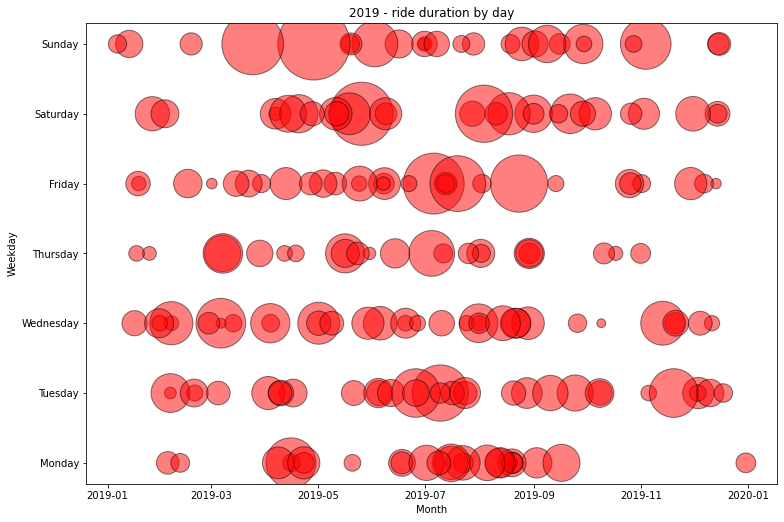

In [27]:
#JT
x_values = sorted_sample_df['DateTime']
y_values = sorted_sample_df['DayName']
duration = sorted_sample_df['Duration']
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.8,.8])
ax.scatter(x_values, y_values, s=duration, c="red", alpha=0.5, edgecolor="black")
ax.set_xlabel('Month')
ax.set_ylabel('Weekday')
ax.set_title('2019 - ride duration by day')

plt.show()

/Users/Hannah_Slay/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


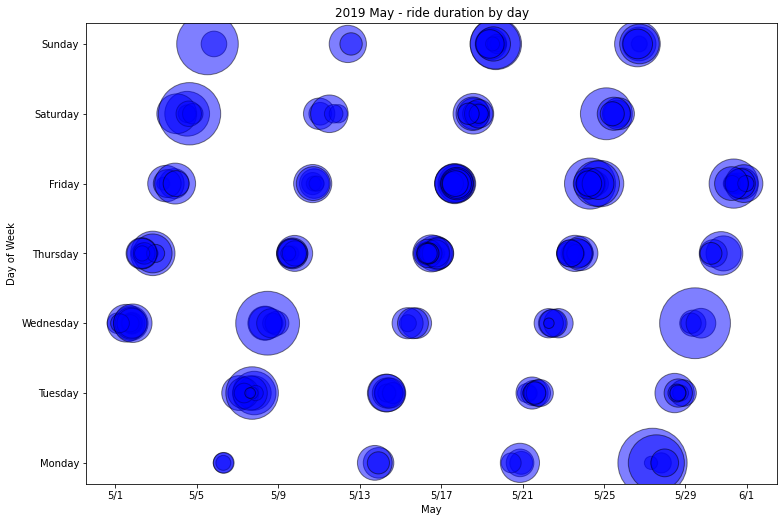

In [28]:
#JT
every_4 = ['5/1', '5/5', '5/9', '5/13', '5/17', '5/21', '5/25', '5/29', '6/1']
#hours = ['0000', '0100', '0200','0300','0400','0500','0600','0700','0800','0900','1000','1100','1200','1300','1400','1500','1600','1700','1800','1900','2000','2100','2200','2300']
x_values_may = sorted_may_sample_df['DateTime']
y_values_may = sorted_may_sample_df['DayName']
duration_may = sorted_may_sample_df['Duration']
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.8,.8])
ax.scatter(x_values_may, y_values_may, s=duration_may, c="blue", alpha=0.5, edgecolor="black")
ax.set_xlabel('May')
ax.set_ylabel('Day of Week')
ax.set_title('2019 May - ride duration by day')
ax.set_xticklabels(every_4)
#ax.set_yticklabels(hours)

plt.show()

In [29]:
#JT
combined_2020_df["DayName"] = combined_2020_df["DateTime"].dt.day_name()
combined_2020_df["DayNum"] = combined_2020_df["DateTime"].dt.weekday

outlierIndex_20 = combined_2020_df[combined_2020_df["Duration"] 
                                > (combined_2020_df["Duration"].mean() + (2 * (combined_2020_df["Duration"].std())))].index

combined_2020_df.drop(outlierIndex_20, inplace=True)

sample_2020_df = combined_2020_df.sample(200)
sample_2020_df["DayInYear"] = sample_2020_df["DateTime"].dt.strftime('%j')
sorted_sample_2020_df = sample_2020_df.sort_values(by="Date")
sorted_sample_2020_df.sort_values(by="DayNum", inplace=True)
sorted_sample_2020_df.head()

,Duration,Start date,End date,Bike number,Member type,DateTime,Time,Month,Date,DayName,DayNum,DayInYear
1248571,791.0,2020-08-31 06:55:14,2020-08-31 07:08:25,CF4F78915EF0D001,Member,2020-08-31 06:55:14,06:55,Aug,08/31/20,Monday,0,244
516055,693.0,2020-03-23 12:03:33,2020-03-23 12:15:07,W21709,Member,2020-03-23 12:03:33,12:03,Mar,03/23/20,Monday,0,083
384196,171.0,2020-03-02 14:37:33,2020-03-02 14:40:24,W24797,Member,2020-03-02 14:37:33,14:37,Mar,03/02/20,Monday,0,062
341102,353.0,2020-02-24 16:24:05,2020-02-24 16:29:58,W21147,Member,2020-02-24 16:24:05,16:24,Feb,02/24/20,Monday,0,055
784926,1935.0,2020-06-15 14:52:57,2020-06-15 15:25:12,726BC037F68010BB,Casual,2020-06-15 14:52:57,14:52,Jun,06/15/20,Monday,0,167


/Users/Hannah_Slay/anaconda/envs/PythonData/lib/python3.6/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


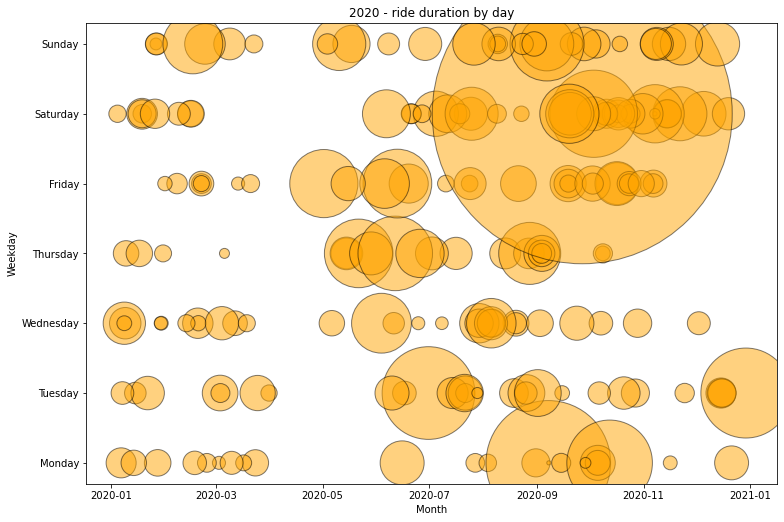

In [30]:
#JT
x_values_20 = sorted_sample_2020_df['DateTime']
y_values_20 = sorted_sample_2020_df['DayName']
duration_20 = sorted_sample_2020_df['Duration']
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.8,.8])
ax.scatter(x_values_20, y_values_20, s=duration_20, c="orange", alpha=0.5, edgecolor="black")
ax.set_xlabel('Month')
ax.set_ylabel('Weekday')
ax.set_title('2020 - ride duration by day')

plt.show()

In [31]:
#JT
is_May_20 = combined_2020_df['Month']=='May'
may_2020_df = combined_2020_df[is_May_20]
#may_2020_df.head()
may_20_sample_df = may_2020_df.sample(200)
#may_20_sample_df.tail()
sorted_may_20_sample_df = may_20_sample_df.sort_values(by="Date")
sorted_may_20_sample_df.sort_values(by="DayNum", inplace=True)
#sorted_may_20_sample_df.head()

/Users/Hannah_Slay/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


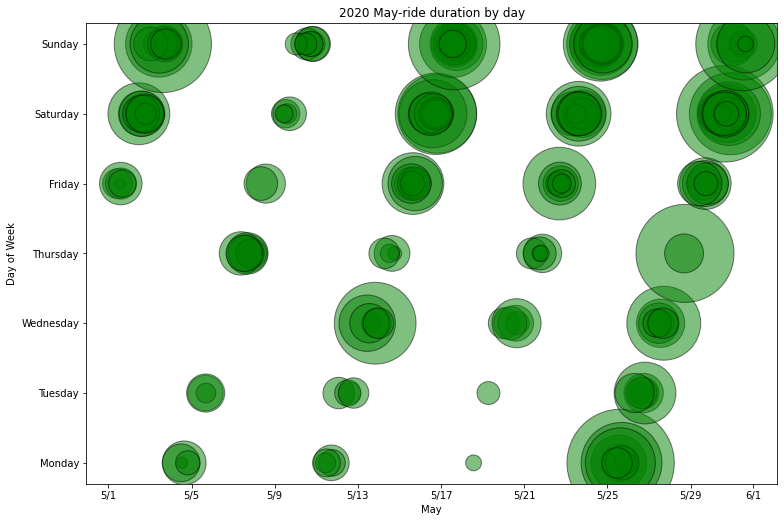

In [32]:
#JT
every_4 = ['5/1', '5/5', '5/9', '5/13', '5/17', '5/21', '5/25', '5/29', '6/1']
x_values_may_20 = sorted_may_20_sample_df['DateTime']
y_values_may_20 = sorted_may_20_sample_df['DayName']
duration_may_20 = sorted_may_20_sample_df['Duration']
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([.1,.1,.8,.8])
ax.scatter(x_values_may_20, y_values_may_20, s=duration_may_20, c="green", alpha=0.5, edgecolor="black")
ax.set_title('2020 May-ride duration by day')
ax.set_xlabel('May')
ax.set_ylabel('Day of Week')
ax.set_xticklabels(every_4)

plt.show()

/Users/Hannah_Slay/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.
/Users/Hannah_Slay/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


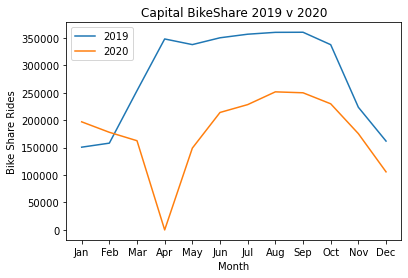

In [33]:
#---Line Chart, ALL rides by month Year over Year
 
#MB
plt.plot(sum_2019, Label = '2019')
plt.plot(sum_2020, Label = '2020')

plt.title("Capital BikeShare 2019 v 2020")
plt.xlabel("Month")
plt.ylabel("Bike Share Rides")
 
plt.legend()
plt.show()

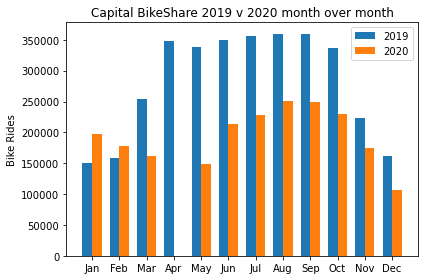

In [34]:
# Bar Graph month over month
#MB
x = np.arange(len(months))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sum_2019, width, label='2019')
rects2 = ax.bar(x + width/2, sum_2020, width, label='2020')

ax.set_ylabel('Bike Rides')
ax.set_title('Capital BikeShare 2019 v 2020 month over month')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()


fig.tight_layout()

plt.show()

In [35]:
#HS
time_2019_df = combined_2019_df
time_2019_df["Time"] = pd.to_datetime(time_2019_df['Time'], format='%H:%M').dt.hour

bins = [-1,5,7,9,11,13,15,17,19,21,24]

bin_labels = ["Pre-Dawn","Early Morning", "Morning Rush", "Mid Morning", "Lunch Rush", "Early Afternoon", "Mid Afternoon", "Evening Rush", "Late Evening", "Overnight"]

# Apply bins and labels
time_df_2019 = time_2019_df
time_df_2019["Time of Day"] = pd.cut(time_df_2019["Time"], bins, labels=bin_labels)

# Group time data frame
time_df_2019 = time_df_2019.groupby('Time of Day').count()

time_2019_counts = time_df_2019["Time"]

time_2019_sum = pd.DataFrame({"Number of Rides": time_2019_counts})
time_2019_sum

,Number of Rides
Time of Day,
Pre-Dawn,87746
Early Morning,261320
Morning Rush,493772
Mid Morning,291521
Lunch Rush,357711
Early Afternoon,377249
Mid Afternoon,615993
Evening Rush,496434
Late Evening,235953


In [36]:
#HS
time_2020_df = combined_2020_df
time_2020_df["Time"] = pd.to_datetime(time_2020_df['Time'], format='%H:%M').dt.hour

bins = [-1,5,7,9,11,13,15,17,19,21,24]

bin_labels = ["Pre-Dawn","Early Morning", "Morning Rush", "Mid Morning", "Lunch Rush", "Early Afternoon", "Mid Afternoon", "Evening Rush", "Late Evening", "Overnight"]

# Apply bins and labels
time_df_2020 = time_2020_df
time_df_2020["Time of Day"] = pd.cut(time_df_2020["Time"], bins, labels=bin_labels)

# Group time data frame
time_df_2020 = time_df_2020.groupby('Time of Day').count()

time_2020_counts = time_df_2020["Time"]

time_2020_sum = pd.DataFrame({"Number of Rides": time_2020_counts})
time_2020_sum

,Number of Rides
Time of Day,
Pre-Dawn,53510
Early Morning,110917
Morning Rush,211838
Mid Morning,213265
Lunch Rush,287426
Early Afternoon,314833
Mid Afternoon,390255
Evening Rush,328419
Late Evening,154145


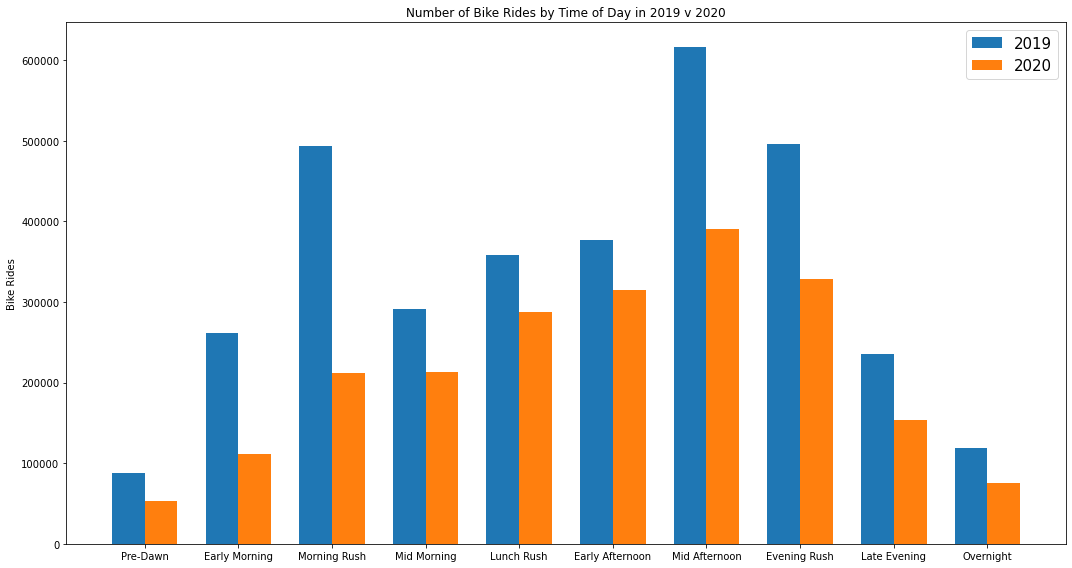

In [37]:
#HS
x_axis = np.arange(len(bin_labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,8))
time_2019 = ax.bar(x_axis - width/2, time_2019_counts, width, label='2019')
time_2020 = ax.bar(x_axis + width/2, time_2020_counts, width, label='2020')
ax.set_ylabel('Bike Rides')
ax.set_title('Number of Bike Rides by Time of Day in 2019 v 2020')
ax.set_xticks(x_axis)
ax.set_xticklabels(bin_labels)
ax.legend(fontsize=15)
fig.tight_layout()
plt.show()


#### Pie Chart 2020 Membership Types

In [38]:
#RG
# 2020 Member Types
rider_type_2020_df = combined_2020_df.copy()
member_type_2020 = rider_type_2020_df.groupby(['Member type'])
member_types_2020 = pd.DataFrame(member_type_2020.size())
member_types_2020

,0
Member type,
Casual,801634
Member,1338953


In [39]:
#RG
member_types_2020 = member_types_2020.reset_index()
member_types_2020


,Member type,0
0,Casual,801634
1,Member,1338953


In [40]:
#RG
member_types_2020.columns
col= ['Member type', 'Total']
member_types_2020.columns = col
member_types_2020


,Member type,Total
0,Casual,801634
1,Member,1338953


In [41]:
#RG
# pie chart
member_list_2020 = member_types_2020["Member type"].tolist()
total_list_2020 = member_types_2020["Total"].tolist()

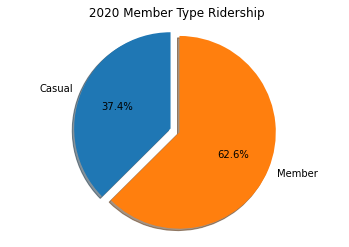

In [42]:
#RG
labels_2020 = member_list_2020
sizes_2020 = total_list_2020
explode = (0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes_2020, explode=explode, labels=labels_2020, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' 2020 Member Type Ridership')
plt.show()



#### "Bar of Pie Chart" 2020




In [43]:
#RG
timeofday_2020_df = time_2020_sum.copy()
timeofday_2020_df

,Number of Rides
Time of Day,
Pre-Dawn,53510
Early Morning,110917
Morning Rush,211838
Mid Morning,213265
Lunch Rush,287426
Early Afternoon,314833
Mid Afternoon,390255
Evening Rush,328419
Late Evening,154145


In [44]:
#RG
# 2020 bar of pie

pie_bar_2020_df = pd.DataFrame()
pie_bar_2020_df['Morning'] = (timeofday_2020_df.loc['Pre-Dawn']+timeofday_2020_df.loc['Early Morning']+timeofday_2020_df.loc['Morning Rush']+timeofday_2020_df.loc['Mid Morning']) * 0.375
pie_bar_2020_df['Afternoon'] = (timeofday_2020_df.loc['Lunch Rush']+timeofday_2020_df.loc['Early Afternoon']+timeofday_2020_df.loc['Mid Afternoon'])*0.375
pie_bar_2020_df['Evening'] = (timeofday_2020_df.loc['Evening Rush']+timeofday_2020_df.loc['Late Evening']+timeofday_2020_df.loc['Overnight'])*0.375



In [45]:
#RG
pie_bar_2020_df['Total'] = pie_bar_2020_df.sum(axis=1)
pie_bar_2020_df

,Morning,Afternoon,Evening,Total
Number of Rides,221073.75,372192.75,209453.625,802720.125


In [46]:
#RG
ratios_2020 = [pie_bar_2020_df['Morning']/pie_bar_2020_df['Total'],pie_bar_2020_df['Afternoon']/pie_bar_2020_df['Total'],pie_bar_2020_df['Evening']/pie_bar_2020_df['Total']]
ratios_2020

[Number of Rides    0.275406
 dtype: float64,
 Number of Rides    0.463664
 dtype: float64,
 Number of Rides    0.26093
 dtype: float64]

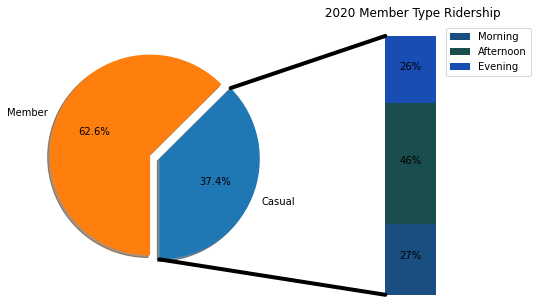

In [47]:
#RG
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart 

angle = 135 * sizes_2020[0]

ax1.pie(sizes_2020, explode=explode, labels=labels_2020, autopct='%1.1f%%',
        shadow=True, startangle=angle)

# bar chart parameters
xpos = 0
bottom = 0
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7]]

for j in range(len(ratios_2020)):
    height = ratios_2020[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Time of Day')
ax2.legend(('Morning', 'Afternoon', 'Evening'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)   

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.title(' 2020 Member Type Ridership')    
plt.show()


#### 2019 Pie Chart Membership Types

In [48]:
#RG
# 2019 Member Types
rider_type_2019_df = combined_2019_df.copy()
member_type_2019 = rider_type_2019_df.groupby(['Member type'])
member_types_2019 = pd.DataFrame(member_type_2019.size())
member_types_2019

,0
Member type,
Casual,401046
Member,2936006


In [49]:
#RG
member_types_2019 = member_types_2019.reset_index()
member_types_2019


,Member type,0
0,Casual,401046
1,Member,2936006


In [50]:
#RG
member_types_2019.columns
col= ['Member type', 'Total']
member_types_2019.columns = col
member_types_2019

,Member type,Total
0,Casual,401046
1,Member,2936006


In [51]:

#RG
# pie chart
member_list_2019 = member_types_2019["Member type"].tolist()
total_list_2019 = member_types_2019["Total"].tolist()

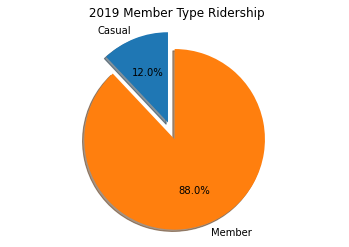

In [52]:
#RG
labels_2019 = member_list_2019
sizes_2019 = total_list_2019
explode = (0,0.2)

fig1, ax1 = plt.subplots()
ax1.pie(sizes_2019, explode=explode, labels=labels_2019, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' 2019 Member Type Ridership')
plt.show()


#### "Bar of Pie Chart"  2019

In [53]:
#RG
timeofday_2019_df = time_2019_sum.copy()
timeofday_2019_df


,Number of Rides
Time of Day,
Pre-Dawn,87746
Early Morning,261320
Morning Rush,493772
Mid Morning,291521
Lunch Rush,357711
Early Afternoon,377249
Mid Afternoon,615993
Evening Rush,496434
Late Evening,235953


In [54]:
#RG
# 2019 bar of pie

pie_bar_2019_df = pd.DataFrame()
pie_bar_2019_df['Morning'] = (timeofday_2019_df.loc['Pre-Dawn']+timeofday_2019_df.loc['Early Morning']+timeofday_2019_df.loc['Morning Rush']+timeofday_2019_df.loc['Mid Morning']) * 0.12
pie_bar_2019_df['Afternoon'] = (timeofday_2019_df.loc['Lunch Rush']+timeofday_2019_df.loc['Early Afternoon']+timeofday_2019_df.loc['Mid Afternoon'])*0.12
pie_bar_2019_df['Evening'] = (timeofday_2019_df.loc['Evening Rush']+timeofday_2019_df.loc['Late Evening']+timeofday_2019_df.loc['Overnight'])*0.12



In [55]:
#RG
pie_bar_2019_df['Total'] = pie_bar_2019_df.sum(axis=1)
pie_bar_2019_df

,Morning,Afternoon,Evening,Total
Number of Rides,136123.08,162114.36,102208.8,400446.24


In [56]:
#RG
ratios_2019 = [pie_bar_2019_df['Morning']/pie_bar_2019_df['Total'],pie_bar_2019_df['Afternoon']/pie_bar_2019_df['Total'],pie_bar_2019_df['Evening']/pie_bar_2019_df['Total']]
ratios_2019

[Number of Rides    0.339928
 dtype: float64,
 Number of Rides    0.404834
 dtype: float64,
 Number of Rides    0.255237
 dtype: float64]

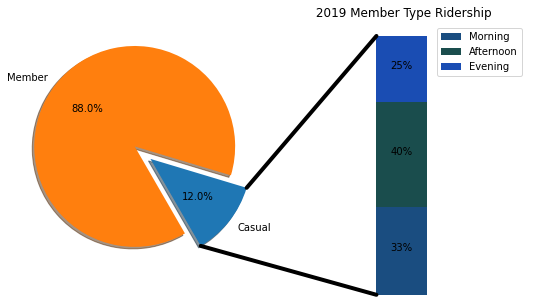

In [57]:

#RG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)
# pie chart
explode = (0,0.2)
angle = -10 * sizes_2019[0]
ax1.pie(sizes_2019, explode=explode, labels=labels_2019, autopct='%1.1f%%',
        shadow=True, startangle=angle)
# bar chart parameters
xpos = 0
bottom = 0
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7]]
for j in range(len(ratios_2019)):
    height = ratios_2019[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')
ax2.set_title('Time of Day')
ax2.legend(('Morning', 'Afternoon', 'Evening'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)
# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])
# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)
# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.title(' 2019 Member Type Ridership')
plt.show()